In [50]:
import pandas as pd
tr=pd.read_csv(r'C:\Users\thiago.oliveira\Trabalho\Estudo\Projeto Kaggle Comp 1 Sales\train.csv')

tr['date'] = pd.to_datetime(tr['date']) 

print(tr.describe())
print(tr.info())

tr.head()

                 id                           date     store_nbr  \
count  3.000888e+06                        3000888  3.000888e+06   
mean   1.500444e+06  2015-04-24 08:27:04.703088384  2.750000e+01   
min    0.000000e+00            2013-01-01 00:00:00  1.000000e+00   
25%    7.502218e+05            2014-02-26 18:00:00  1.400000e+01   
50%    1.500444e+06            2015-04-24 12:00:00  2.750000e+01   
75%    2.250665e+06            2016-06-19 06:00:00  4.100000e+01   
max    3.000887e+06            2017-08-15 00:00:00  5.400000e+01   
std    8.662819e+05                            NaN  1.558579e+01   

              sales   onpromotion  
count  3.000888e+06  3.000888e+06  
mean   3.577757e+02  2.602770e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    1.100000e+01  0.000000e+00  
75%    1.958473e+02  0.000000e+00  
max    1.247170e+05  7.410000e+02  
std    1.101998e+03  1.221888e+01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entri

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [51]:
te=pd.read_csv(r'C:\Users\thiago.oliveira\Trabalho\Estudo\Projeto Kaggle Comp 1 Sales\test.csv')
ss=pd.read_csv(r'C:\Users\thiago.oliveira\Trabalho\Estudo\Projeto Kaggle Comp 1 Sales\sample_submission.csv')


te['date'] = pd.to_datetime(te['date']) 

data_test = te['date'].min()

te=te.merge(ss,how='left',on='id')

te.head()

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,0.0
1,3000889,2017-08-16,1,BABY CARE,0,0.0
2,3000890,2017-08-16,1,BEAUTY,2,0.0
3,3000891,2017-08-16,1,BEVERAGES,20,0.0
4,3000892,2017-08-16,1,BOOKS,0,0.0


In [52]:
df=pd.concat([te,tr])

In [53]:
st=pd.read_csv(r'C:\Users\thiago.oliveira\Trabalho\Estudo\Projeto Kaggle Comp 1 Sales\stores.csv')

print(st.describe())
print(st.info())

st.head()

       store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [54]:
df=df.merge(st,how='left',on='store_nbr') #juntando as informações das lojas
df.head(3)

,id,date,store_nbr,family,onpromotion,sales,city,state,type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,0.0,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,0.0,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,0.0,Quito,Pichincha,D,13


In [55]:
ho=pd.read_csv(r'C:\Users\thiago.oliveira\Trabalho\Estudo\Projeto Kaggle Comp 1 Sales\holidays_events.csv')

ho['date'] = pd.to_datetime(ho['date']) 

print(ho.describe())
print(ho.info())

ho.head()


                                date
count                            350
mean   2015-04-24 00:45:15.428571392
min              2012-03-02 00:00:00
25%              2013-12-23 06:00:00
50%              2015-06-08 00:00:00
75%              2016-07-03 00:00:00
max              2017-12-26 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB
None


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [56]:
ho1=ho[(ho['transferred']!=True) & (ho['type']!='Transfer')]
lh=ho1[ho1['locale']=='Local']
nh=ho1[ho1['locale']=='National']
rh=ho1[ho1['locale']=='Regional']
rh

,date,type,locale,locale_name,description,transferred
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
23,2012-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
24,2012-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
47,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
58,2013-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
76,2013-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
77,2013-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
96,2014-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False


In [57]:
# Junção local holidays por df
lh = lh[['date','locale_name']]
lh['local_holiday'] = 1
df=df.merge(lh,how='left',left_on=['city','date'],right_on=['locale_name','date']).drop('locale_name',axis=1)
df['local_holiday'].fillna(0,inplace=True)

In [58]:
df.head(1)

,id,date,store_nbr,family,onpromotion,sales,city,state,type,cluster,local_holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,0.0,Quito,Pichincha,D,13,0.0


In [59]:
# Junção Regional holidays por df
rh = rh[['date','locale_name']]
rh['regional_holiday'] = 1
df=df.merge(rh,how='left',left_on=['state','date'],right_on=['locale_name','date']).drop('locale_name',axis=1)
df['regional_holiday'].fillna(0,inplace=True)
df

C:\Users\thiago.oliveira\AppData\Local\Temp\ipykernel_20776\2595469098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rh['regional_holiday'] = 1


,id,date,store_nbr,family,onpromotion,sales,city,state,type,cluster,local_holiday,regional_holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,0.000,Quito,Pichincha,D,13,0.0,0.0
1,3000889,2017-08-16,1,BABY CARE,0,0.000,Quito,Pichincha,D,13,0.0,0.0
2,3000890,2017-08-16,1,BEAUTY,2,0.000,Quito,Pichincha,D,13,0.0,0.0
3,3000891,2017-08-16,1,BEVERAGES,20,0.000,Quito,Pichincha,D,13,0.0,0.0
4,3000892,2017-08-16,1,BOOKS,0,0.000,Quito,Pichincha,D,13,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3000883,2017-08-15,9,POULTRY,0,438.133,Quito,Pichincha,B,6,0.0,0.0
3029396,3000884,2017-08-15,9,PREPARED FOODS,1,154.553,Quito,Pichincha,B,6,0.0,0.0
3029397,3000885,2017-08-15,9,PRODUCE,148,2419.729,Quito,Pichincha,B,6,0.0,0.0
3029398,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8,121.000,Quito,Pichincha,B,6,0.0,0.0


In [60]:
# Junção Nacionais holidays por df
nh = nh[['date']]
nh['national_holiday'] = 1
df=df.merge(nh,how='left',left_on='date',right_on='date')
df['national_holiday'].fillna(0,inplace=True)


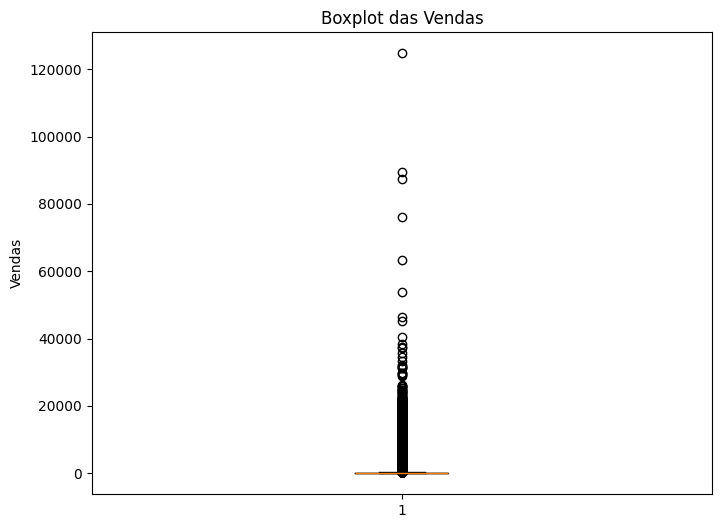

In [61]:
import matplotlib.pyplot as plt

# Criar o boxplot
plt.figure(figsize=(8,6))
plt.boxplot(df1['sales'])
plt.title('Boxplot das Vendas')
plt.ylabel('Vendas')
plt.show()

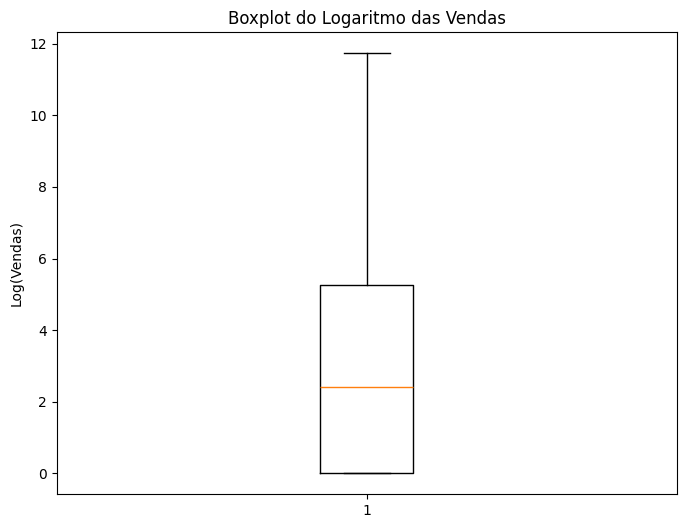

In [62]:
import numpy as np
import matplotlib.pyplot as plt
# Criar o boxplot com os dados transformados
plt.figure(figsize=(8,6))
plt.boxplot(np.log1p(df1['sales']))
plt.title('Boxplot do Logaritmo das Vendas')
plt.ylabel('Log(Vendas)')
plt.show()


In [111]:
df1=df[['id','date','store_nbr','family','sales','onpromotion','cluster','type','local_holiday','regional_holiday','national_holiday']].copy()
# Converter a coluna para tipo categórico
df1['family'] = df1['family'].astype('category')
# Converter os valores categóricos para códigos numéricos
df1['family'] = df1['family'].cat.codes

# Converter a coluna para tipo categórico
df1['type'] = df1['type'].astype('category')
# Converter os valores categóricos para códigos numéricos
df1['type'] = df1['type'].cat.codes

# Adicionando features temporais
df1['Ano'] = df1['date'].dt.year
df1['Mes'] = df1['date'].dt.month
df1['Dia'] = df1['date'].dt.day
df1['Dia_semana'] = df1['date'].dt.weekday

df1.head(2)

,id,date,store_nbr,family,sales,onpromotion,cluster,type,local_holiday,regional_holiday,national_holiday,Ano,Mes,Dia,Dia_semana
0,3000888,2017-08-16,1,0,0.0,0,13,3,0.0,0.0,0.0,2017,8,16,2
1,3000889,2017-08-16,1,1,0.0,0,13,3,0.0,0.0,0.0,2017,8,16,2


In [138]:
#vamos mudar porque o train deve ser oque está depois da data e não usar o train_test_split
train = df1[df1['date'] < data_test]
test = df1[df1['date'] >= data_test]

# Selecionar as características (features) e a variável alvo (target)
features = ['store_nbr', 'family', 'onpromotion', 'cluster', 'type', 'local_holiday', 'regional_holiday', 'national_holiday', 'Ano','Mes', 'Dia', 'Dia_semana','quarter']
X = train[features]#dados para prever
y = train['sales']#target
# Aplicar a transformação logarítmica
y_log = np.log1p(y)

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.1, random_state=42)

# Treinando o modelo
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train_log)

# Fazendo previsões no conjunto de teste
y_pred_log = model.predict(X_test)

# Aplicar a transformação inversa para obter previsões na escala original
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Corrigindo previsões negativas
y_pred = np.where(y_pred < 0, 0, y_pred)

# Calcular o Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'Root Mean Squared Logarithmic Error: {rmsle}')

Root Mean Squared Logarithmic Error: 1.0253223010375812


In [159]:
result = pd.DataFrame()
result['Pred']=y_pred
result['Real']=y_test.reset_index(drop=True)
result.head(10)

,Pred,Real
0,1.057297,0.000
1,3090.489990,2915.000
2,1263.896973,1562.000
3,0.360238,0.000
4,114.384064,47.000
5,1.911678,0.000
6,0.240599,0.000
7,403.881500,333.967
8,0.000000,0.000
9,2.567590,1.000
